Задание:
Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:

Был ли эксперимент успешен в целом.
Проанализируйте, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.
*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

In [86]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import norm
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [87]:
way = '/home/anastasiia/prog_dir/prog_dir_env/ANALYTICS/Final_project/Проект_3_'

In [88]:
users_test = pd.read_csv(way + 'users_test.csv', sep=';')
users_control_1 = pd.read_csv(way + 'users_control_1.csv', sep=';')
users_control_2 = pd.read_csv(way + 'users_control_2.csv', sep=';')

transactions_test = pd.read_csv(way + 'transactions_test.csv', sep=';')
transactions_control_1 = pd.read_csv(way + 'transactions_control_1.csv', sep=';')
transactions_control_2 = pd.read_csv(way + 'transactions_control_2.csv', sep=';')

In [89]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [90]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [91]:
# удалим пустые строки
transactions_control_1.dropna(inplace=True)

In [92]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [93]:
# зададим колонкам правильный формат

true_dtypes = {'uid': 'int64',
               'country': 'object',
               'joined_at': 'datetime64[ns]',
               'paid_at': 'datetime64[ns]',
               'revenue': 'int64',
               'payment_id': 'int64',
               'from_page': 'object',
               'product_type': 'object'}

In [94]:
transactions_control_1 = transactions_control_1.astype(true_dtypes)
transactions_control_2 = transactions_control_2.astype(true_dtypes)
transactions_test = transactions_test.astype(true_dtypes)

In [95]:
# Посмотрим на наличие дубликатов в датафреймах
print(f'transactions_control_1 all:{transactions_control_1.shape[0]}   unique:{transactions_control_1.shape[0] - transactions_control_1.duplicated().sum()}',
      f'users_control_1        all:{users_control_1.shape[0]}  unique:{users_control_1.shape[0] - users_control_1.duplicated().sum()}',
      f'transactions_control_2 all:{transactions_control_2.shape[0]}   unique:{transactions_control_2.shape[0] - transactions_control_2.duplicated().sum()}',
      f'users_control_2        all:{users_control_2.shape[0]}  unique:{users_control_2.shape[0] - users_control_2.duplicated().sum()}',
      f'transactions_test      all:{transactions_test.shape[0]}   unique:{transactions_test.shape[0] - transactions_test.duplicated().sum()}',
      f'users_test             all:{users_test.shape[0]}  unique:{users_test.shape[0] - users_test.duplicated().sum()}', sep='\n')

transactions_control_1 all:377   unique:356
users_control_1        all:4340  unique:4340
transactions_control_2 all:328   unique:323
users_control_2        all:4264  unique:4264
transactions_test      all:273   unique:266
users_test             all:4308  unique:4308


In [96]:
# Удалим дубликаты из рабочих датафреймов
transactions_test.drop_duplicates(inplace=True)
transactions_control_1.drop_duplicates(inplace=True)
transactions_control_2.drop_duplicates(inplace=True)

In [97]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [98]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [99]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [100]:
# Поменяем str на list с числовыми значениями в колонке visit_days 
users_control_1['visit_days'] = users_control_1.visit_days.fillna(0)\
                                .astype('str')\
                                .apply(lambda x: [int(num) for num in x.split(',')])
users_control_2['visit_days'] = users_control_2.visit_days.fillna(0)\
                                .astype('str')\
                                .apply(lambda x: [int(num) for num in x.split(',')])
users_test['visit_days']      = users_test.visit_days.fillna(0)\
                                .astype('str')\
                                .apply(lambda x: [int(num) for num in x.split(',')])


In [101]:
# Заполним пустые значения нулями для удобства работы
users_control_1[['coins', 'was_premium', 'is_premium']] = users_control_1[['coins', 'was_premium', 'is_premium']].fillna(0).astype(int)
users_control_2[['coins', 'was_premium', 'is_premium']] = users_control_2[['coins', 'was_premium', 'is_premium']].fillna(0).astype(int)
users_test[['coins', 'was_premium', 'is_premium']] = users_test[['coins', 'was_premium', 'is_premium']].fillna(0).astype(int)

In [102]:
# Посмотрим сколько по времени длился эксперимент
print(f'control_1 start: {transactions_control_1.joined_at.min()}    end: {transactions_control_1.joined_at.max()}',
      f'control_2 start: {transactions_control_2.joined_at.min()}    end: {transactions_control_2.joined_at.max()}',
      f'test      start: {transactions_test.joined_at.min()}    end: {transactions_test.joined_at.max()}', sep='\n')

control_1 start: 2015-01-19 11:49:00    end: 2017-10-31 22:17:00
control_2 start: 2017-01-11 08:36:00    end: 2017-10-31 17:43:00
test      start: 2017-01-11 03:07:00    end: 2017-10-31 23:40:00


In [103]:
# В контрольную группу 1 попали старые данные, выходящие за временной отрезок эксперимента, посмотрим много ли таких 
transactions_control_1.query('joined_at<"2017-01-11 01"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type


In [104]:
# Всего три записи, все они принадлежат одному пользователю. Должно быть, это случайная ошибка, удалим эти записи.
transactions_control_1 = transactions_control_1.query('joined_at>="2017-01-11 01"')

In [105]:
# Проверим, нет ли ошибок с учетом платежей
print(f'control_1 count error: transactions = {transactions_control_1.query("revenue<0").shape[0]}  users = {users_control_1.query("total_revenue<0").shape[0]}',
      f'control_2 count error: transactions = {transactions_control_2.query("revenue<0").shape[0]}  users = {users_control_2.query("total_revenue<0").shape[0]}',
      f'test      count error: transactions = {transactions_test.query("revenue<0").shape[0]}  users = {users_test.query("total_revenue<0").shape[0]}', sep='\n')
# Все ок.

control_1 count error: transactions = 0  users = 0
control_2 count error: transactions = 0  users = 0
test      count error: transactions = 0  users = 0


In [106]:
# Посмотрим на описание прибыли в группах
print(f'control_1 revenue: \n{users_control_1.total_revenue.describe()}', '',
      f'control_2 revenue: \n{users_control_2.total_revenue.describe()}', '',
      f'test revenue: \n{users_test.total_revenue.describe()}', sep='\n')


control_1 revenue: 
count      4340.000000
mean        594.761982
std        7987.922925
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      486330.000000
Name: total_revenue, dtype: float64

control_2 revenue: 
count     4264.000000
mean       450.384146
std       2859.242228
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      81796.000000
Name: total_revenue, dtype: float64

test revenue: 
count      4308.000000
mean        534.080316
std        4371.682632
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      129870.000000
Name: total_revenue, dtype: float64


In [107]:
# Объединим датафреймы для удобства
control_1 = users_control_1.merge(transactions_control_1, on=['uid', 'country'])
control_2 = users_control_2.merge(transactions_control_2, on=['uid', 'country'])
test      = users_test.merge(transactions_test, on=['uid', 'country'])


In [108]:
# Посмотрим нет ли ошибок в доходах:доход от одной транзакции не может быть больше общего дохода от пользователя
print(f'control_1 revenue error: {control_1.query("revenue>total_revenue").shape[0]}',
      f'control_2 revenue error: {control_2.query("revenue>total_revenue").shape[0]}',
      f'test      revenue error: {test.query("revenue>total_revenue").shape[0]}', sep='\n')

control_1 revenue error: 1
control_2 revenue error: 0
test      revenue error: 1


In [109]:
# Очистим датафреймы от этих ошибок 
control_1 = control_1.query("revenue<=total_revenue")
test      = test.query("revenue<=total_revenue")


control_1_uid_error = control_1.query("revenue>total_revenue").uid.tolist()
test_uid_error      = test.query("revenue>total_revenue").uid.tolist()

users_control_1 = users_control_1[users_control_1.uid.isin(control_1_uid_error) == False]
users_test      = users_test[users_test.uid.isin(test_uid_error) == False]


In [110]:
# Посмотрим на количество стран по группам.Оно не одинаковое
pd.DataFrame({'control_1':[users_control_1.country.nunique()],
             'control_2':[users_control_2.country.nunique()],
              'test':[users_test.country.nunique()]})

,control_1,control_2,test
0,40,45,51


In [111]:
# Соберем списки стран по каждой группе
countries_control_1 = users_control_1.country.unique()
countries_control_2 = users_control_2.country.unique()
countries_test      = users_test.country.unique()

# Страны, которые есть во всех группах
countries_list=[]
for country in countries_test:
    if country in countries_control_1:
        if country in countries_control_2:
            countries_list.append(country)
len(countries_list)

25

In [112]:
# Мы можем сравнивать корректно только те страны,которые есть и в контрольных и в тестовой группе,их всего 25.
# Очистим датафреймы от лишних сведений
users_control_1 = users_control_1[users_control_1.country.isin(countries_list)]
users_control_2 = users_control_2[users_control_2.country.isin(countries_list)]
users_test      = users_test[users_test.country.isin(countries_list)]

transactions_control_1 = transactions_control_1[transactions_control_1.country.isin(countries_list)]
transactions_control_2 = transactions_control_2[transactions_control_2.country.isin(countries_list)]
transactions_test      = transactions_test[transactions_test.country.isin(countries_list)]


In [113]:
# Создадим таблицу с пользователями в трех группах в разбивке по странам и посмотрим есть ли различия в распределении
crosstab_countries = users_control_1.groupby('country',as_index=False)\
                        .agg({'uid': 'count'}).rename(columns ={'uid': 'control_1'})\
                    .merge(users_control_2.groupby('country',as_index=False)\
                        .agg({'uid': 'count'}).rename(columns ={'uid': 'control_2'}), on='country')\
                    .merge(users_test.groupby('country',as_index=False)\
                        .agg({'uid': 'count'}).rename(columns ={'uid': 'test'}), on='country')\
                    .set_index('country')

sstat, p, dof, expected = chi2_contingency(crosstab_countries)
print(f'p-value:{p}')

p-value:0.9664633964431885


Пользователи одинаково распределены по странам во всех трех группах

In [114]:
# Посмотрим на данные по странам в графическом виде
denesity_control_1 = users_control_1.groupby('country',as_index = False)\
                    .agg({'uid':'count'})\
                    .rename(columns={'uid':'users_count'})\
                    .sort_values('users_count',ascending = False)
denesity_control_2 = users_control_2.groupby('country',as_index = False)\
                    .agg({'uid':'count'})\
                    .rename(columns={'uid':'users_count'})\
                    .sort_values('users_count',ascending = False)
denesity_test      = users_test.groupby('country',as_index = False)\
                    .agg({'uid':'count'})\
                    .rename(columns={'uid':'users_count'})\
                    .sort_values('users_count',ascending = False)

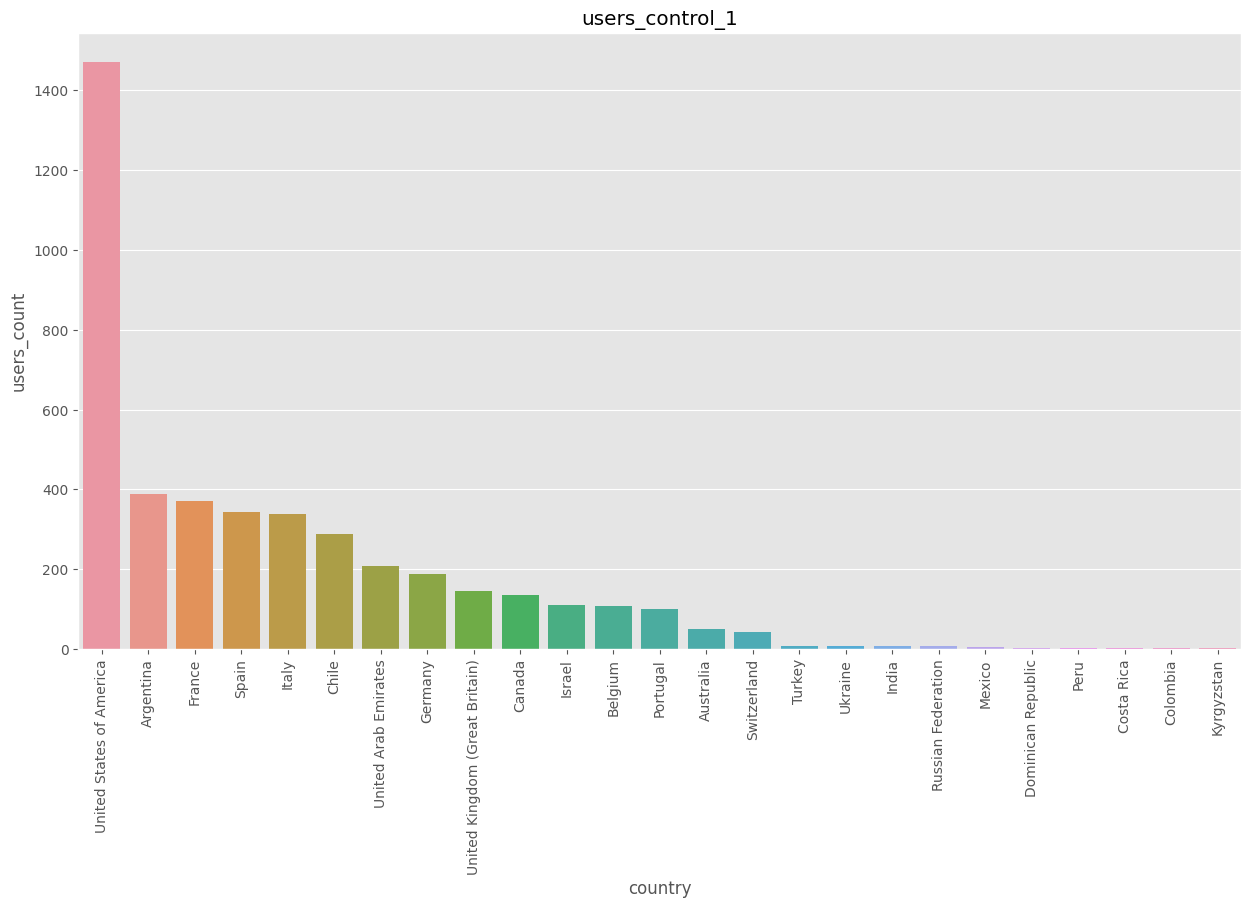

In [115]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=denesity_control_1.country, y=denesity_control_1.users_count)
plt.title('users_control_1')
plt.show()

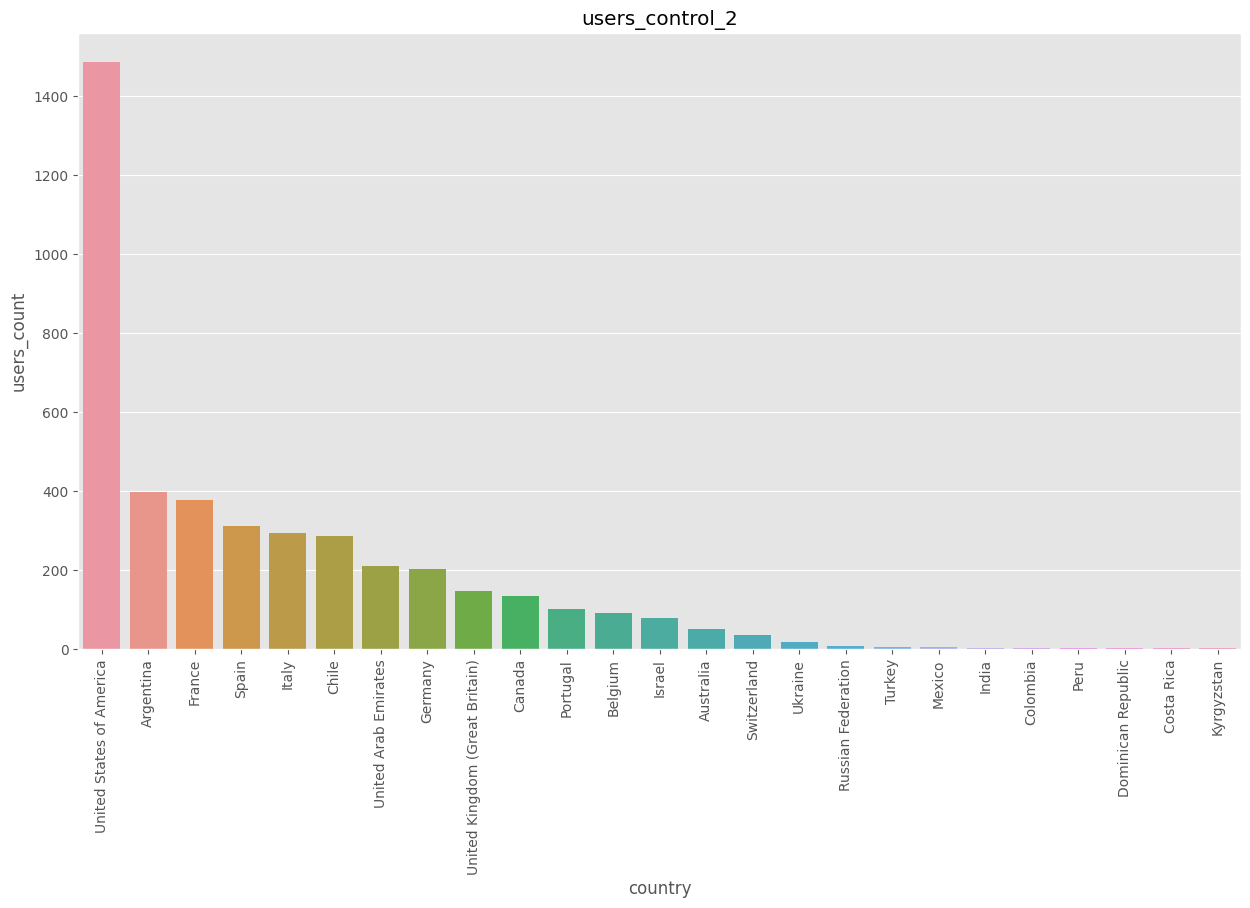

In [116]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=denesity_control_2.country, y=denesity_control_2.users_count)
plt.title('users_control_2')
plt.show()

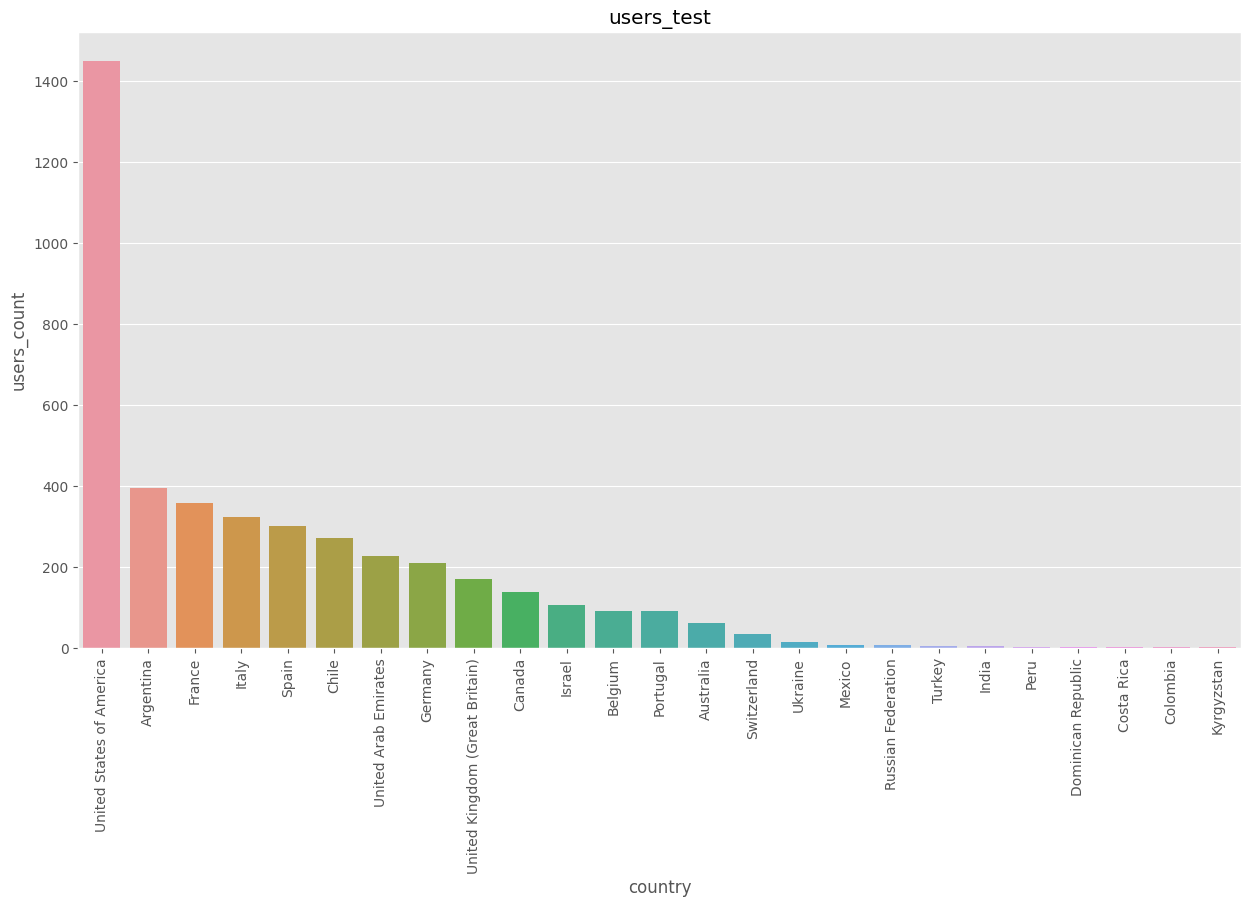

In [117]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=denesity_test.country, y=denesity_test.users_count)
plt.title('users_test')
plt.show()

Видно, что основная часть пользователей находится примерно в 15 странах и единичные пользователи в других странах.

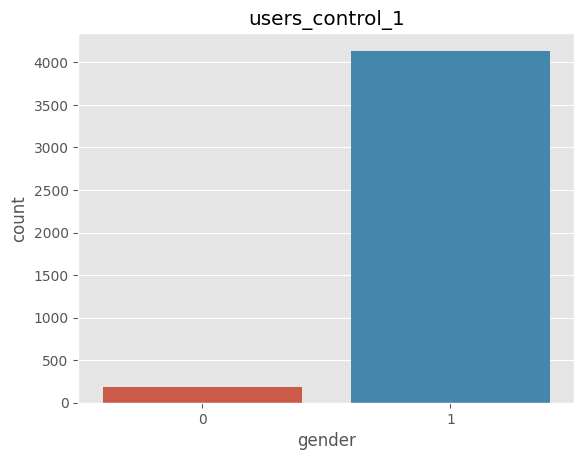

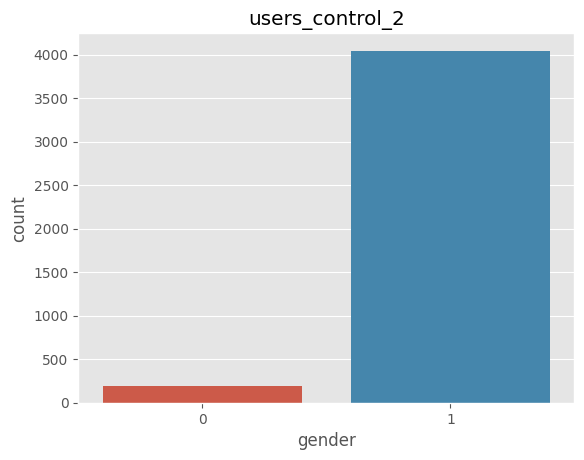

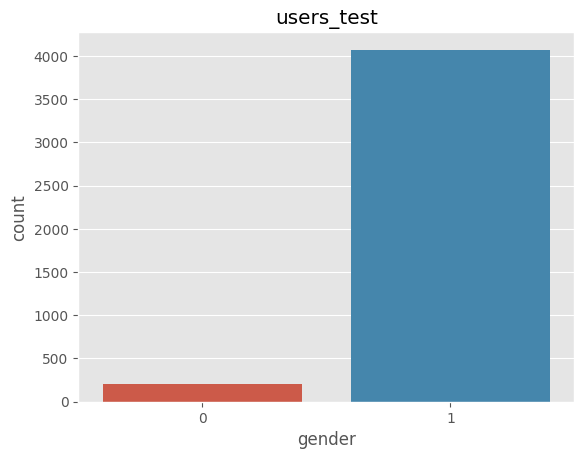

In [118]:
# Посмотрим на распределение полов по группам. По графикам кажется, что оно примерно одинаковое
sns.countplot(x=users_control_1.gender)
plt.title('users_control_1')
plt.show()
sns.countplot(x=users_control_2.gender)
plt.title('users_control_2')
plt.show()
sns.countplot(x=users_test.gender)
plt.title('users_test')
plt.show()

In [119]:
# Проверим это методами статистики (хи-квадрат)
# Строим таблицу сопряженности для трех групп по полу
tab_gender = pd.DataFrame({'users_control_1': {'sex_1': users_control_1.query('gender==0').shape[0],'sex_2': users_control_1.query('gender==1').shape[0]},
                           'users_control_2': {'sex_1': users_control_2.query('gender==0').shape[0],'sex_2': users_control_2.query('gender==1').shape[0]},
                           'users_test': {'sex_1': users_test.query('gender==0').shape[0],'sex_2': users_test.query('gender==1').shape[0]}})

In [120]:
# Распределение полов в трех группах статистически не отличается
sstat,p,dof,expected = chi2_contingency(tab_gender)
print(f'p-value:{p}')

p-value:0.5451533281384093


In [121]:
# Посмотрим на распределение по возрасту
crosstab_age = users_control_1.groupby('age',as_index = False)\
                            .agg({'uid': 'count'}).rename(columns={'uid': 'control_1'})\
              .merge(users_control_2.groupby('age',as_index = False)\
                            .agg({'uid': 'count'}).rename(columns={'uid': 'control_2'}),on='age')\
              .merge(users_test.groupby('age',as_index = False)\
                            .agg({'uid': 'count'}).rename(columns={'uid': 'test'}),on='age')\
              .set_index('age')

In [122]:
# Распределение возраста в трех группах статистически не отличается
sstat,p,dof,expected = chi2_contingency(crosstab_age)
print(f'p-value:{p}')

p-value:0.17778848610898118


In [123]:
# Посмотрим на некоторые характеристики по возрасту среди пользователей
users_control_1.age.describe()

count    4319.000000
mean       32.085900
std        10.264126
min        16.000000
25%        24.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [124]:
users_control_2.age.describe()

count    4238.000000
mean       32.041529
std        10.146888
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [125]:
users_test.age.describe()

count    4271.000000
mean       31.903770
std        10.269227
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

Во всех трех группах наиболее распространенный возраст пользователей 25-38 лет.

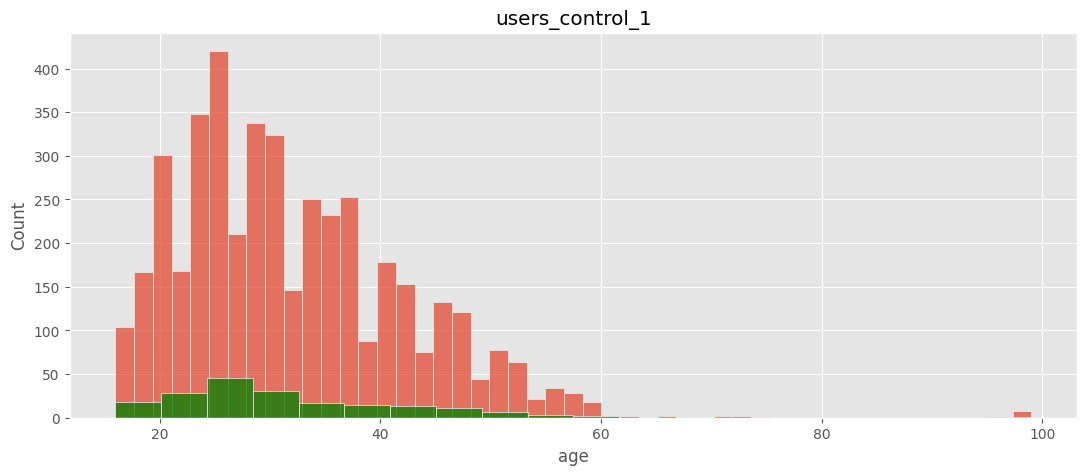

In [126]:
# Для лучшего понимания,посмотрим на возраст и платежеспособность на графиках
plt.figure(figsize = (13,5))
sns.histplot(users_control_1.age) # все пользователи
sns.histplot(control_1.drop_duplicates('uid').age, color ='g') #платящие пользователи
plt.title('users_control_1')
plt.show()

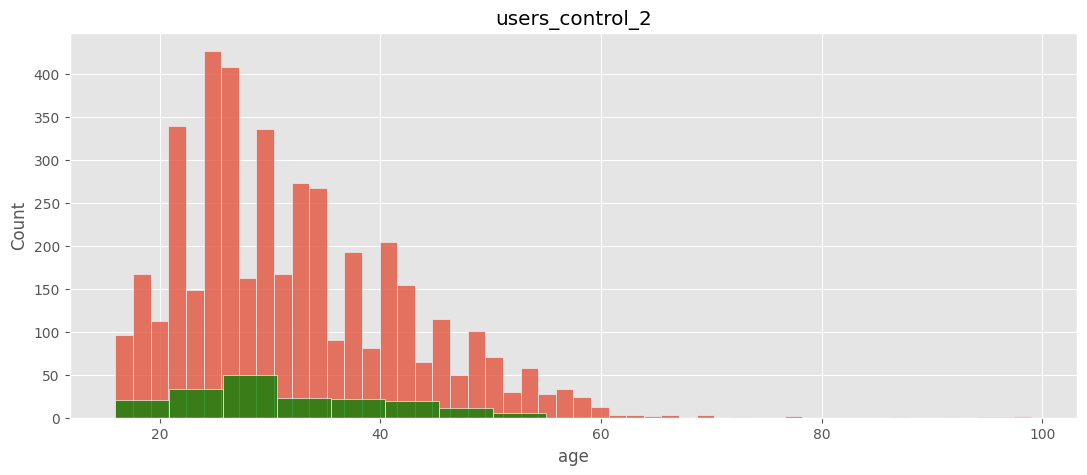

In [127]:
plt.figure(figsize=(13,5))
sns.histplot(users_control_2.age) # все пользователи
sns.histplot(control_2.drop_duplicates('uid').age, color='g') #платящие пользователи
plt.title('users_control_2')
plt.show()

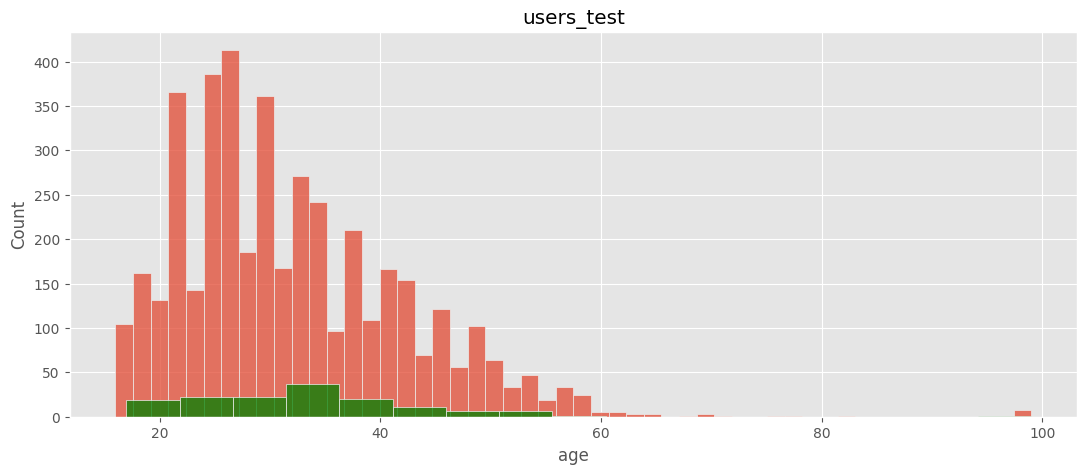

In [128]:
plt.figure(figsize = (13,5))
sns.histplot(users_test.age) # все пользователи
sns.histplot(test.drop_duplicates('uid').age, color ='g') #платящие пользователи
plt.title('users_test')
plt.show()

In [129]:
# После всех преобразований посмотрим на размер групп
print (f'control_1 size: {users_control_1.shape[0]}',\
       f'control_2 size: {users_control_2.shape[0]}',\
       f'test      size: {users_test.shape[0]}', sep='\n')

control_1 size: 4319
control_2 size: 4238
test      size: 4271


Итак, можно утверждать, что группы не сильно отличаются друг от друга по размеру, соотношению полов и возрастным характеристикам, распределению пользователей по странам.


По данным можем сделать вывод, что это А/А/Б-тестирование, где тесты А/А и А/Б проводятся паралельно. 
Для А/А тестирования будем сравнивать между собой контрольные группы, для А/Б тестирования - тестовую и контрольную № 2.

После подготовки данных стоит определиться с метриками, изменения в которых нужно искать.
Единственное, что известно об эксперименте - изменилась стоимость премиум-подписки (однако неизвестно дешевле она стала, или дороже).
Такое изменение может повлиять на все метрики, связанные с доходом: конверсия пользователей в покупку, средний чек, ARPPU,ARPU.

Начнем сконверсии в покупку. Для этого используем датафреймы users. Так как мы имеем дело с категориальными переменными, сравнивать их будем, используя статистику хи-квадрат.

Н0 - конверсия в группах не отличается.

Н1 - конверсия в группах отличается.

In [130]:
# Строим таблицу сопряженности для трех групп
tab_aab = pd.DataFrame({'users_control_1': [users_control_1.query('total_revenue>0').shape[0], users_control_1.shape[0]],
                     'users_control_2': [users_control_2.query('total_revenue>0').shape[0], users_control_2.shape[0]],
                     'users_test': [users_test.query('total_revenue>0').shape[0], users_test.shape[0]]})

In [131]:
# Сперва посмотрим на результат глазами. 
tab_aab

,users_control_1,users_control_2,users_test
0,192,185,145
1,4319,4238,4271


In [132]:
# Кажется, в тестовой группе конверсия проседает.
print(f'CR_control_1 = {np.round(tab_aab.users_control_1[0]/tab_aab.users_control_1[1]*100,2)}',
      f'CR_control_2 = {np.round(tab_aab.users_control_2[0]/tab_aab.users_control_2[1]*100,2)}',
      f'CR_test      = {np.round(tab_aab.users_test[0]/tab_aab.users_test[1]*100,2)}', sep='\n')

CR_control_1 = 4.45
CR_control_2 = 4.37
CR_test      = 3.39


In [133]:
tab_ab = tab_aab[['users_control_2','users_test']]
tab_aa = tab_aab[['users_control_1','users_control_2']]

In [134]:
# Теперь посмотрим статистику.
sstat_ab, p_ab, dof_ab, expected_ab = chi2_contingency(tab_ab)
sstat_aa, p_aa, dof_aa, expected_aa = chi2_contingency(tab_aa)
print(f'A/A test p-value:{p_aa}',\
     f'A/B test p-value:{p_ab}',sep ='\n')

A/A test p-value:0.9042176608251423
A/B test p-value:0.029746317719067213


A/A тест пройден успешно (p-value> 0.5), A/Б тест показал статистически значимую разницу, конверсия в покупку в тестовой группе упала.
Проверим есть ли различие в конверсии у жителей разных стран.

In [135]:
# По многим странам выборки очень маленькие, поэтому отберем только те страны, 
# в которых больше 30 пользователей, посчитаем этих пользователей
top_control_1 = users_control_1.groupby('country', as_index = False).size().query('size >=30').rename(columns={'size':'all_users'})
top_control_2 = users_control_2.groupby('country', as_index = False).size().query('size >=30').rename(columns={'size':'all_users'})
top_test      = users_test.groupby('country', as_index = False).size().query('size >=30').rename(columns={'size':'all_users'})

In [136]:
# Убедимся, что во всех трех группах топовыми оказались одни и те же страны
top_control_1.country.tolist().sort() == top_control_1.country.tolist().sort() == top_test.country.tolist().sort()

True

In [137]:
# Запишем эти страны отдельно
top_countries =top_control_1.country.tolist()

In [138]:
# Добавим платящих пользователей
top_control_1 = users_control_1[users_control_1.country.isin(top_countries)]\
                .query('total_revenue > 0').groupby('country', as_index = False)\
                .agg({'uid': 'count'}).rename(columns={'uid': 'paying_users'})\
                .merge(top_control_1, on='country')
top_control_2 = users_control_2[users_control_2.country.isin(top_countries)]\
                .query('total_revenue > 0').groupby('country', as_index = False)\
                .agg({'uid': 'count'}).rename(columns={'uid': 'paying_users'})\
                .merge(top_control_2, on='country')
top_test      = users_test[users_test.country.isin(top_countries)]\
                .query('total_revenue > 0').groupby('country', as_index = False)\
                .agg({'uid': 'count'}).rename(columns={'uid': 'paying_users'})\
                .merge(top_test, on='country') 

In [139]:
# А/А тест конверсии по странам
for country in top_countries:
    # создаем таблицу сопряженности
    contingency_tab = pd.concat([top_control_1[top_control_1['country']\
                                .isin([country])][['paying_users', 'all_users']],
                                top_control_2[top_control_2['country']\
                                .isin([country])][['paying_users', 'all_users']]], ignore_index = True )
    # считаем статистику
    sstat, p, dof, expected = chi2_contingency(contingency_tab)
    if p <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {country}:', 
          f'p-value={p} {message}',sep='\t')

for Argentina:	p-value=0.8014394051723064 
for Australia:	p-value=1.0 
for Belgium:	p-value=0.10861124384257573 
for Canada:	p-value=0.28441003601653336 
for Chile:	p-value=1.0 
for France:	p-value=0.7294264118780424 
for Germany:	p-value=1.0 
for Israel:	p-value=0.4388123933836593 
for Italy:	p-value=0.9591499326574056 
for Portugal:	p-value=0.30471006517795857 
for Spain:	p-value=0.5191680992826042 
for Switzerland:	p-value=1.0 
for United Arab Emirates:	p-value=0.7572191714787613 
for United Kingdom (Great Britain):	p-value=1.0 
for United States of America:	p-value=0.7682995904144194 


In [140]:
# А/Б тест конверсии по странам
for country in top_countries:
    # создаем таблицы сопряженности
    contingency_tab = pd.concat([top_control_2[top_control_2['country']\
                                .isin([country])][['paying_users', 'all_users']],
                                top_test[top_test['country']\
                                .isin([country])][['paying_users', 'all_users']]], ignore_index = True)
    # считаем статистику
    sstat, p, dof, expected = chi2_contingency(contingency_tab)
    if p <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {country}:', 
          f'p-value={p} {message}',sep='\t')

for Argentina:	p-value=0.6385903192637155 
for Australia:	p-value=0.8793059624264712 
for Belgium:	p-value=0.19094794836900347 
for Canada:	p-value=0.7911987844010631 
for Chile:	p-value=0.15358005398077845 
for France:	p-value=0.4654130697844475 
for Germany:	p-value=0.8273232213993672 
for Israel:	p-value=0.6331125632036436 
for Italy:	p-value=0.15912316233193413 
for Portugal:	p-value=1.0 
for Spain:	p-value=0.6575727217881244 
for Switzerland:	p-value=1.0 
for United Arab Emirates:	p-value=0.5124862264981729 
for United Kingdom (Great Britain):	p-value=0.6041323613761771 
for United States of America:	p-value=0.38500611898468395 


In [141]:
# У пользователей из Португалии подозрительное значение p-value, посмотрим внимательнее на эту группу
all_users_control_2_Portugal = users_control_2.query('country =="Portugal"').shape[0]
patying_users_control_2_Portugal = users_control_2.query('total_revenue>0&country =="Portugal"').shape[0]
all_users_test_Portugal = users_test.query('country =="Portugal"').shape[0]
patying_users_test_Portugal = users_test.query('total_revenue>0&country =="Portugal"').shape[0]

Portugal_ab_tab = pd.DataFrame({'all_users': [all_users_control_2_Portugal,all_users_test_Portugal], 
                              'patying_users': [patying_users_control_2_Portugal,patying_users_test_Portugal]})
Portugal_ab_tab

,all_users,patying_users
0,100,6
1,91,0


In [142]:
# Нулевое значение в тестовой группе не считывалось должным образом
# Считаем статистику
sstat_Portugal,p_Portugal,dof_Portugal,expected_Portugal = chi2_contingency(Portugal_ab_tab)
print(f'A/B test for Portugal, p-value ={p_Portugal}')

A/B test for Portugal, p-value =0.058875361135724585


In [143]:
# То же самое проделаем для пользователей из Швейцарии
all_users_control_2_Switzerland = users_control_2.query('country =="Switzerland"').shape[0]
patying_users_control_2_Switzerland = users_control_2.query('total_revenue>0&country =="Switzerland"').shape[0]
all_users_test_Switzerland  = users_test.query('country =="Switzerland"').shape[0]
patying_users_test_Switzerland = users_test.query('total_revenue>0&country =="Switzerland "').shape[0]
Switzerland_ab_tab = pd.DataFrame({'all_users': [all_users_control_2_Switzerland,all_users_test_Switzerland], 
                              'patying_users': [patying_users_control_2_Switzerland,patying_users_test_Switzerland]})

sstat_Switzerland,p_Switzerland,dof_Switzerland,expected_Switzerland = chi2_contingency(Switzerland_ab_tab)
print(f'A/B test for Switzerland, p-value ={p_Switzerland}')

A/B test for Switzerland, p-value =0.2681077864675412


In [144]:
other_countries_AA = pd.DataFrame({'users_control_1': [users_control_1[users_control_1.country.isin(top_countries)== False]\
                                        .query('total_revenue > 0').uid.count(),
                                                     users_control_1[users_control_1.country.isin(top_countries)== False]\
                                        .uid.count()],
                                   'users_control_2': [users_control_2[users_control_2.country.isin(top_countries)== False]\
                                        .query('total_revenue > 0').uid.count(),
                                    users_control_2[users_control_2.country.isin(top_countries)== False]\
                                        .uid.count()]})
other_countries_AB = pd.DataFrame({'users_test': [users_test[users_test.country.isin(top_countries)== False]\
                                        .query('total_revenue > 0').uid.count(),
                                                     users_test[users_test.country.isin(top_countries)== False]\
                                        .uid.count()],
                                   'users_control_2': [users_control_2[users_control_2.country.isin(top_countries)== False]\
                                        .query('total_revenue > 0').uid.count(),
                                    users_control_2[users_control_2.country.isin(top_countries)== False]\
                                        .uid.count()]})

In [145]:
# считаем статистику
sstat_aa, p_aa, dof_aa, expected_aa = chi2_contingency(other_countries_AA)
sstat_ab, p_ab, dof_ab, expected_ab = chi2_contingency(other_countries_AB)
print('for other countries:',\
      f'A/A test p-value={p_aa}',\
      f'A/B test p-value={p_ab}',sep='\n')

for other countries:
A/A test p-value=0.2521303982870915
A/B test p-value=1.0


In [146]:
other_countries_AB

,users_test,users_control_2
0,2,2
1,43,43


В меньших группах при разбивке по странам существенных различий в конверсии в покупку у пользователей тестовой группы не наблюдается.

#### Сперва определимся с нашей аудиторией. 
Наиболее интересной группой для приложения, на мой взгляд, являются пользователи 25-35 лет, поскольку это уже достаточно взрослые платежеспособные люди, 
которые находятся в активном поиске партнера и готовы за это заплатить. Люди младше менее платежеспособны и гораздо более коммуникабельны, это студенты, которые
находятся в среде своих сверстников и дейтинговое приложение не имеет для них такой ценности. Люди старшего возраста также платежеспособны и могут быть заинтересованы в оформлении
подписки,но эта группа меньше по численности, поэтому не так интересна для бизнеса. 
Итак, разделим наших пользователей на следующие возрастные группы: до 24 лет, 25-34 года, 35-44 года,старше 45 лет.


In [147]:
# Создадим словарь и датафрейм с данными по возрастам и списки с группами и возрастами 
age_groups = {'control_1_age_up_to_24': [users_control_1.query('total_revenue>0&age<25').shape[0],
                                        users_control_1.query('age<25').shape[0]],
              'control_1_age_25_34':   [users_control_1.query('total_revenue>0&age>24&age<35').shape[0],
                                        users_control_1.query('age>24&age<35').shape[0]],
              'control_1_age_35_44':   [users_control_1.query('total_revenue>0&age>34&age<45').shape[0],
                                        users_control_1.query('age>34&age<45').shape[0]],
              'control_1_age_over_45': [users_control_1.query('total_revenue>0&age>44').shape[0],
                                        users_control_1.query('age>44').shape[0]],
              
              'control_2_age_up_to_24':[users_control_2.query('total_revenue>0&age<25').shape[0],
                                        users_control_2.query('age<25').shape[0]],
              'control_2_age_25_34':   [users_control_2.query('total_revenue>0&age>24&age<35').shape[0],
                                        users_control_2.query('age>24&age<35').shape[0]],
              'control_2_age_35_44':   [users_control_2.query('total_revenue>0&age>34&age<45').shape[0],
                                        users_control_2.query('age>34&age<45').shape[0]],
              'control_2_age_over_45': [users_control_2.query('total_revenue>0&age>44').shape[0],
                                        users_control_2.query('age>44').shape[0]],
              
              'test_age_up_to_24':     [users_test.query('total_revenue>0&age<25').shape[0],
                                        users_test.query('age<25').shape[0]],
              'test_age_25_34':        [users_test.query('total_revenue>0&age>24&age<35').shape[0],
                                        users_test.query('age>24&age<35').shape[0]],
              'test_age_35_44':        [users_test.query('total_revenue>0&age>34&age<45').shape[0],
                                        users_test.query('age>34&age<45').shape[0]],
              'test_age_over_45':      [users_test.query('total_revenue>0&age>44').shape[0],
                                        users_test.query('age>44').shape[0]]}
all_age_groups = pd.DataFrame(age_groups)
groups_list    = ['control_1', 'control_2', 'test']
age_list       = ['_age_up_to_24', '_age_25_34', '_age_35_44', '_age_over_45']

In [148]:
all_age_groups

,control_1_age_up_to_24,control_1_age_25_34,control_1_age_35_44,control_1_age_over_45,control_2_age_up_to_24,control_2_age_25_34,control_2_age_35_44,control_2_age_over_45,test_age_up_to_24,test_age_25_34,test_age_35_44,test_age_over_45
0,46,88,31,27,51,75,37,22,30,56,42,17
1,1088,1690,979,562,1052,1739,904,543,1059,1752,928,532


In [149]:
# Посмотрим на конверсию в группах по возрастам
print(f'CR for control_1 age up_to_24: {np.round(all_age_groups.control_1_age_up_to_24[0]/all_age_groups.control_1_age_up_to_24[1]*100,2)}',
      f'                 age_25_34:    {np.round(all_age_groups.control_1_age_25_34[0]/all_age_groups.control_1_age_25_34[1]*100,2)}',
      f'                 age_35_44:    {np.round(all_age_groups.control_1_age_35_44[0]/all_age_groups.control_1_age_35_44[1]*100,2)}',
      f'                 age_over_45:  {np.round(all_age_groups.control_1_age_over_45[0]/all_age_groups.control_1_age_over_45[1]*100,2)}',
      f'CR for control_2 age up_to_24: {np.round(all_age_groups.control_2_age_up_to_24[0]/all_age_groups.control_2_age_up_to_24[1]*100,2)}',
      f'                 age_25_34:    {np.round(all_age_groups.control_2_age_25_34[0]/all_age_groups.control_2_age_25_34[1]*100,2)}',
      f'                 age_35_44:    {np.round(all_age_groups.control_2_age_35_44[0]/all_age_groups.control_2_age_35_44[1]*100,2)}',
      f'                 age_over_45:  {np.round(all_age_groups.control_2_age_over_45[0]/all_age_groups.control_2_age_over_45[1]*100,2)}',
      f'CR for test      age up_to_24: {np.round(all_age_groups.test_age_up_to_24[0]/all_age_groups.test_age_up_to_24[1]*100,2)}',
      f'                 age_25_34:    {np.round(all_age_groups.test_age_25_34[0]/all_age_groups.test_age_25_34[1]*100,2)}',
      f'                 age_35_44:    {np.round(all_age_groups.test_age_35_44[0]/all_age_groups.test_age_35_44[1]*100,2)}',
      f'                 age_over_45:  {np.round(all_age_groups.test_age_over_45[0]/all_age_groups.test_age_over_45[1]*100,2)}', sep='\n')

CR for control_1 age up_to_24: 4.23
                 age_25_34:    5.21
                 age_35_44:    3.17
                 age_over_45:  4.8
CR for control_2 age up_to_24: 4.85
                 age_25_34:    4.31
                 age_35_44:    4.09
                 age_over_45:  4.05
CR for test      age up_to_24: 2.83
                 age_25_34:    3.2
                 age_35_44:    4.53
                 age_over_45:  3.2


In [150]:
# А/А тест конверсии по возрастным группам

for i in range(4):
    # создаем таблицу сопряженности
    contingency_tab = pd.DataFrame(age_groups[groups_list[0]+age_list[i]],age_groups[groups_list[1]+age_list[i]]).reset_index()
    # считаем статистику
    sstat, p, dof, expected = chi2_contingency(contingency_tab)
    if p <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {age_list[i][1:]}:', 
              f'p-value={p} {message}')

for age_up_to_24: p-value=0.5790060477927119 
for age_25_34: p-value=0.2743896198056104 
for age_35_44: p-value=0.3603905991726394 
for age_over_45: p-value=0.6633580449803169 


In [151]:
 # А/Б тест конверсии по возрастным группам

for i in range(4):
    # создаем таблицу сопряженности
    contingency_tab = pd.DataFrame(age_groups[groups_list[1]+age_list[i]],age_groups[groups_list[2]+age_list[i]]).reset_index()
    # считаем статистику
    sstat, p, dof, expected = chi2_contingency(contingency_tab)
    if p <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {age_list[i][1:]}:', 
              f'p-value={p} {message}')
    

for age_up_to_24: p-value=0.027389212279586666 значимое различие между группами
for age_25_34: p-value=0.11351437690251605 
for age_35_44: p-value=0.7475174157873923 
for age_over_45: p-value=0.5749487091419723 


Пользователи до 25 лет имеют низкий коэффициент конверсии, в тестовой группе он значимо снижается по сравнению с контрольной. 

In [152]:
# Посчитаем повторные покупки для разных групп
RP_control_1 = np.round(transactions_control_1.shape[0]/transactions_control_1.uid.nunique(),2)
RP_control_2 = np.round(transactions_control_2.shape[0]/transactions_control_2.uid.nunique(),2)
RP_test = np.round(transactions_test.shape[0]/transactions_test.uid.nunique(),2)
# Посчитаем средний чек
avg_check_control_1 = np.round(transactions_control_1.revenue.sum()/transactions_control_1.shape[0],2)
avg_check_control_2 = np.round(transactions_control_2.revenue.sum()/transactions_control_2.shape[0],2)
avg_check_test = np.round(transactions_test.revenue.sum()/transactions_test.shape[0],2)
# Посчитаем ARPPU за весь период проведения эксперимента(10 месяцев)
ARPPU_control_1 = np.round(RP_control_1*avg_check_control_1,2)
ARPPU_control_2 = np.round(RP_control_2*avg_check_control_2,2)
ARPPU_test = np.round(RP_test*avg_check_test,2)

In [153]:
print(f'control_1  repeat purchases : {RP_control_1} average check: {avg_check_control_1}  ARPPU:{ARPPU_control_1}',\
      f'control_2  repeat purchases : {RP_control_2} average check: {avg_check_control_2}  ARPPU:{ARPPU_control_2}',\
      f'test       repeat purchases : {RP_test} average check: {avg_check_test}  ARPPU:{ARPPU_test}',sep='\n')

control_1  repeat purchases : 1.84 average check: 7065.15  ARPPU:12999.88
control_2  repeat purchases : 1.72 average check: 5903.02  ARPPU:10153.19
test       repeat purchases : 1.81 average check: 8866.65  ARPPU:16048.64


На первый взгляд кажется, что в тестовой группе вырос средний чек и ARPPU. Проведем статистические тесты, чтобы убедиться,что это так

Посмотрим на средний чек. Проведем тест Шапиро-Уилка на нормальность распределения в группах

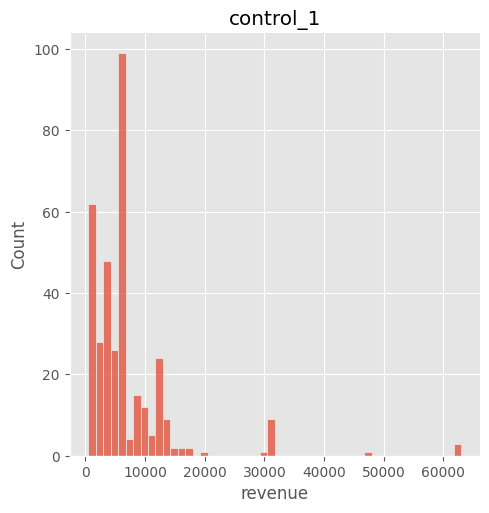

In [154]:
sns.displot(transactions_control_1.revenue)
plt.title('control_1')
plt.show()

In [155]:
stats.shapiro(transactions_control_1.revenue) # В группе распределение ненормальное(pvalue < 0.05)

ShapiroResult(statistic=0.5975985527038574, pvalue=7.841124767948765e-28)

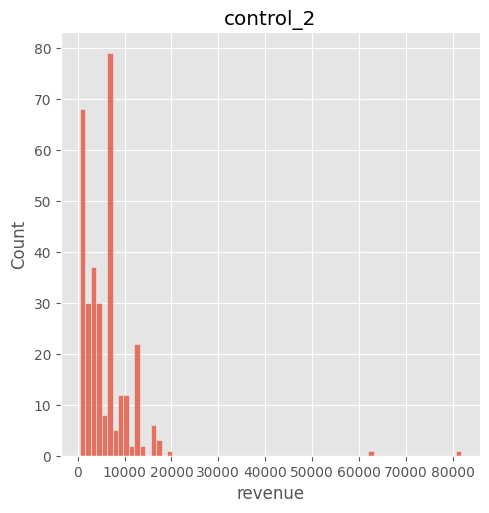

In [156]:
sns.displot(transactions_control_2.revenue)
plt.title('control_2')
plt.show()

In [157]:
stats.shapiro(transactions_control_2.revenue) # В группе распределение ненормальное(pvalue < 0.05)

ShapiroResult(statistic=0.5282029509544373, pvalue=2.3278402274192557e-28)

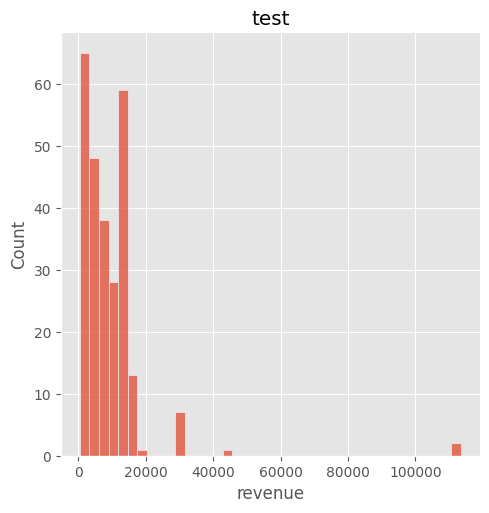

In [158]:
sns.displot(transactions_test.revenue)
plt.title('test')
plt.show()

In [159]:
stats.shapiro(transactions_test.revenue) # В группе распределение ненормальное(pvalue < 0.05)

ShapiroResult(statistic=0.49685782194137573, pvalue=1.1785862339401819e-26)

In [160]:
# Проверим гомогенность дисперсий при помощи критерия Левене
# Между контрольными группами
stats.levene(transactions_control_1.revenue,transactions_control_2.revenue)
# Результаты p-value > 0.05, это значит, что мы принимаем нулевую гипотезу о том, что наши дисперсии равны

LeveneResult(statistic=2.136266508124056, pvalue=0.14432044501195804)

In [161]:
# Между контролем и тестом
stats.levene(transactions_control_2.revenue,transactions_test.revenue)
# Результаты статистически значимы(pvalue < 0.05), это значит, что мы отклоняем нулевую гипотезу о том, что наши дисперсии равны

LeveneResult(statistic=11.502729692504456, pvalue=0.0007423330111195601)

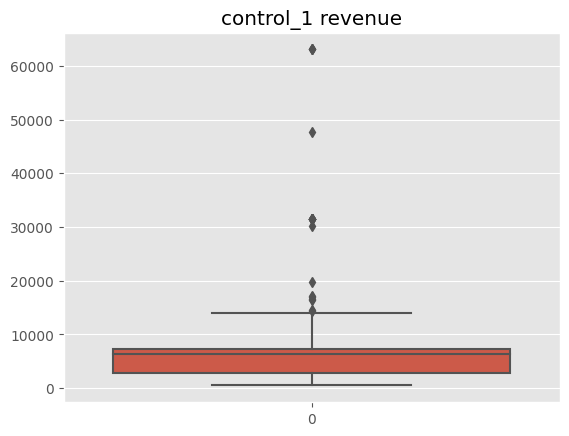

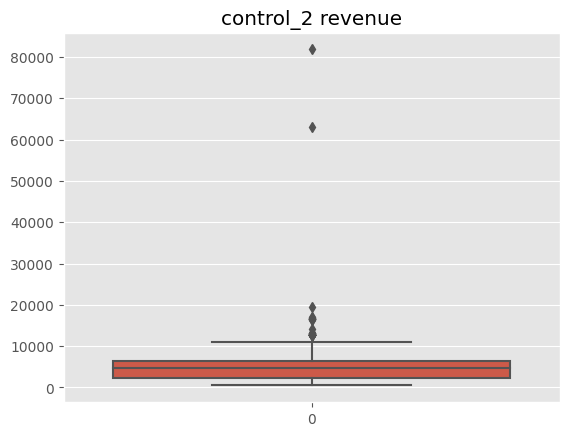

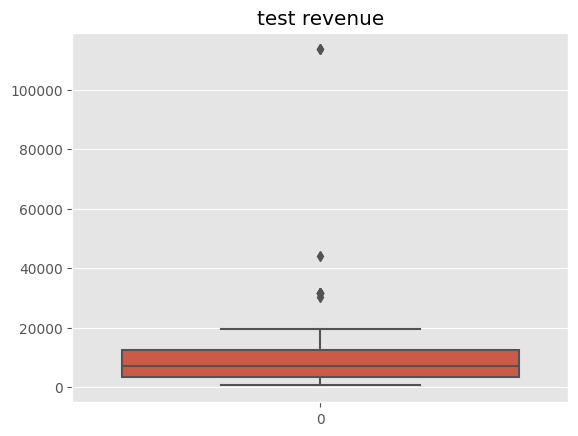

In [162]:
sns.boxplot(data = transactions_control_1.revenue)
plt.title('control_1 revenue')
plt.show()

sns.boxplot(data =transactions_control_2.revenue)
plt.title('control_2 revenue')
plt.show()

sns.boxplot(data =transactions_test.revenue)
plt.title('test revenue')
plt.show()

Посмотрим на количество одинаковых значений в выборках, их наличие может повлиять на результаты статистических тестирований.

In [163]:
control_1_same_value = transactions_control_1.revenue.duplicated().sum()
control_2_same_value = transactions_control_2.revenue.duplicated().sum()
test_same_value = transactions_test.revenue.duplicated().sum()

In [164]:
print(f'control_1 all transactions: {transactions_control_1.shape[0]} repeated values:{control_1_same_value}, {np.round(control_1_same_value/transactions_control_1.shape[0]*100)}%',
      f'control_2 all transactions: {transactions_control_2.shape[0]} repeated values:{control_2_same_value}, {np.round(control_2_same_value/transactions_control_2.shape[0]*100)}%',
      f'test      all transactions: {transactions_test.shape[0]} repeated values:{test_same_value}, {np.round(test_same_value/transactions_test.shape[0]*100)}%',sep='\n')

control_1 all transactions: 353 repeated values:229, 65.0%
control_2 all transactions: 319 repeated values:198, 62.0%
test      all transactions: 262 repeated values:139, 53.0%


Распределение во всех трех группах ненормальное, есть большие выбросы, гомогенность дисперсий между тестовой и контрольной группой нарушена.
Посмотрим как распределено выборочное среднее в группах(его нормальное распределение важно при проведении т-теста). Для этого воспользуемся бутстрапом, готовым кодом с Githab(https://gist.github.com/KIRILLxBREAK/4010dd4eaf45a2203cb28251ce099329#file-bootstrap_check_normality-py).

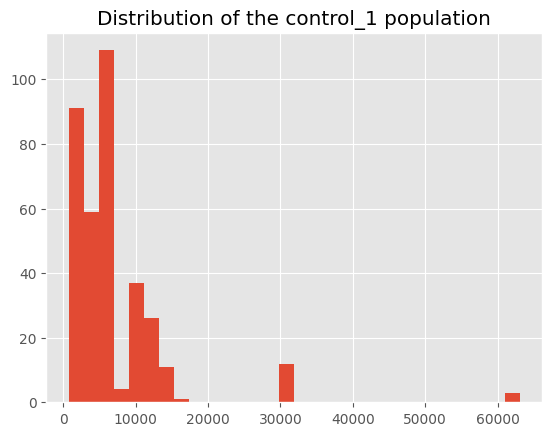

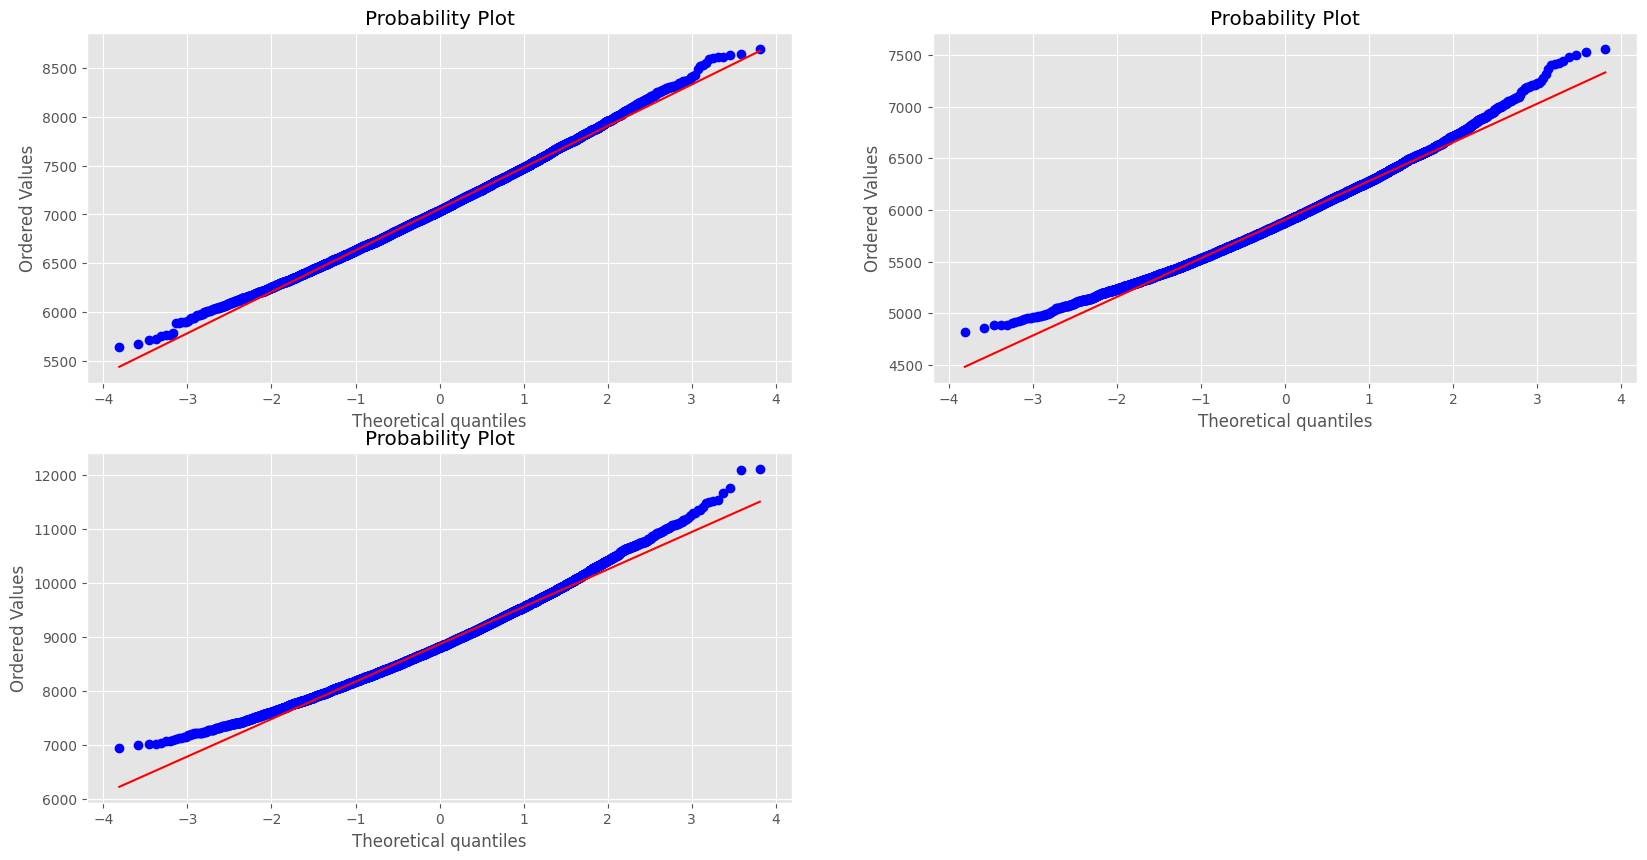

Тест на нормальность распределения control_1 группы: W = 0.997 , p-value = 0.000 => стат значимо не нормально
Тест на нормальность распределения control_1 группы: W = 0.993 , p-value = 0.000 => стат значимо не нормально
Тест на нормальность распределения target группы: W = 0.991 , p-value = 0.000 => стат значимо не нормально


/home/anastasiia/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [165]:
sample_means_control_1 = []
sample_means_control_2 = []
sample_means_test = []
for i in range(10000):
  sample_control_1 = transactions_control_1.revenue.sample(frac=1, replace=True)
  sample_control_2 = transactions_control_2.revenue.sample(frac=1, replace=True)
  sample_test = transactions_test.revenue.sample(frac=1, replace=True)
  sample_means_control_1.append(sample_control_1.mean())
  sample_means_control_2.append(sample_control_2.mean())
  sample_means_test.append(sample_test.mean())
  
# Plot the population
count, bins, ignored = plt.hist(sample_control_1, 30)
plt.title('Distribution of the control_1 population')
plt.show()
# Q-Q plots for control and target groups
pylab.figure(figsize=(20,10))
pylab.subplot(2,2,1)
stats.probplot(sample_means_control_1, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(sample_means_control_2, dist="norm", plot=pylab)
pylab.subplot(2,2,3)
stats.probplot(sample_means_test, dist="norm", plot=pylab)
pylab.show()

# check for normality by Shapiro-Wilk test
sp = stats.shapiro(sample_means_control_1)
concl = '=> не стат значимо, нормальное' if sp[1]>0.05 else '=> стат значимо не нормально' 
print('Тест на нормальность распределения control_1 группы: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

sp = stats.shapiro(sample_means_control_2)
concl = '=> не стат значимо, нормальное' if sp[1]>0.05 else '=> стат значимо не нормально' 
print('Тест на нормальность распределения control_1 группы: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

sp = stats.shapiro(sample_means_test)
concl = '=> не стат значимо, нормальное' if sp[1]>0.05 else '=> стат значимо не нормально' 
print('Тест на нормальность распределения target группы: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)


Учитывая описанные выше особенности наших данных, мы не будем использовать т-тест для анализа.
U-тест Mann-Whitney также чувствителен к дисбалансу в выборках.
Применим бутстрап и посмотрим медианный чек, а не средний.

In [166]:
print(f'control_1 median check = {transactions_control_1.revenue.median()}',
      f'control_2 median check = {transactions_control_2.revenue.median()}',
      f'test median check      = {transactions_test.revenue.median()}',sep='\n')


control_1 median check = 6292.0
control_2 median check = 4732.0
test median check      = 7098.0


In [167]:
# Используем код из лекций по статистике

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95, # уровень значимости
    plot = True # флаг, указывающий на необходимость вывода прогресс-бара и блока визуализации
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it), disable = not(plot)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    if plot:
        plt.hist(pd_boot_data[0], bins = 50)

        plt.style.use('ggplot')
        plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

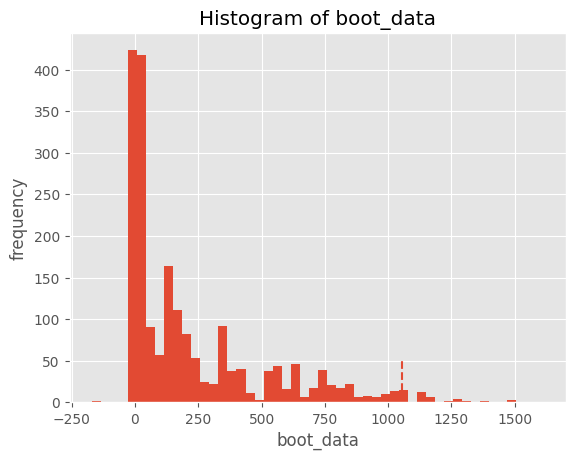

In [168]:
# AA-тест
median_check_AA = get_bootstrap(transactions_control_1.revenue, transactions_control_2.revenue, boot_it=2000)

In [169]:
# Медианный чек в контрольных группах статистически не отличается, A/A тест пройден
median_check_AA['p_value']

0.4504079124593654

  0%|          | 0/2000 [00:00<?, ?it/s]

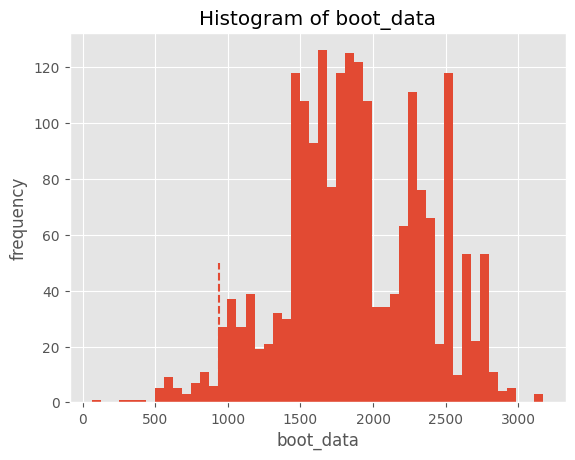

In [170]:
median_check_AB = get_bootstrap(transactions_test.revenue, transactions_control_2.revenue, boot_it=2000)

In [171]:
# Медианный чек в тестовой группе отличается от контрольной
median_check_AB['p_value']

0.0001261087665374608

  0%|          | 0/2000 [00:00<?, ?it/s]

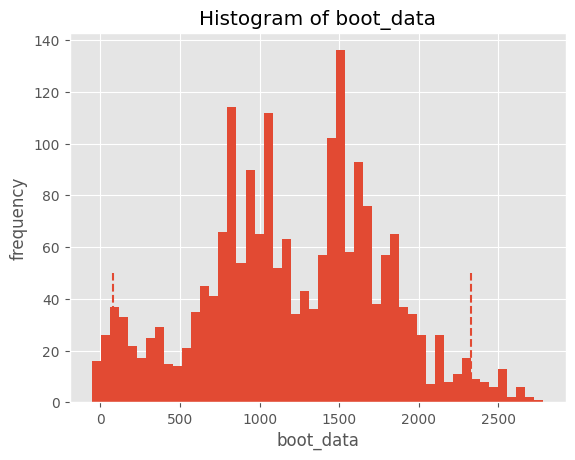

In [172]:
# Изначально было решено проводить А/Б тестирование с контрольной группой 2, 
# но здесь мне показались очень близкими значения медианных чеков у контрольной 1 и тестовой групп, 
# поэтому проведем еще один А/Б тест
median_check_AB = get_bootstrap(transactions_test.revenue, transactions_control_1.revenue, boot_it=2000)

In [173]:
# Медианный чек в тестовой группе отличается от контрольной
median_check_AB['p_value']

0.03334402090392941

In [174]:
# Посчитаем медианный чек для пользователей разных стран A/A тест
for country in top_countries:
    # отбираем данные
    for_countries_control_1 = transactions_control_1[transactions_control_1.country == country].revenue
    for_countries_control_2 = transactions_control_2[transactions_control_2.country == country].revenue
    # считаем статистику
    median_check = get_bootstrap(for_countries_control_1, for_countries_control_2, boot_it=2000, plot = False)
    if median_check['p_value'] <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {country}:', 
          f'p-value={median_check["p_value"]} {message}',sep='\t')

for Argentina:	p-value=0.36625018785516106 
for Australia:	p-value=0.767445575821261 
for Belgium:	p-value=0.20760099718576197 
for Canada:	p-value=0.21417173429984726 
for Chile:	p-value=0.7549093507247613 
for France:	p-value=0.3232590369860685 
for Germany:	p-value=0.06351634592557708 
for Israel:	p-value=0.16489653318033715 
for Italy:	p-value=0.07559960274792688 
for Portugal:	p-value=0.7029811144194942 
for Spain:	p-value=0.36586451858742686 
for Switzerland:	p-value=0.1287359746072012 
for United Arab Emirates:	p-value=0.5215897997099409 
for United Kingdom (Great Britain):	p-value=0.022291814544746946 значимое различие между группами
for United States of America:	p-value=0.40243259568164436 


А/А тест хорошо сработал для всех стран, кроме Великобритании. В дальнейшем исключим эту страну из А/Б тестирования. 

In [175]:
top_countries.pop(13)

'United Kingdom (Great Britain)'

In [176]:
users_test = users_test.query('country!="United Kingdom (Great Britain)"')
users_control_1 = users_control_1.query('country!="United Kingdom (Great Britain)"')
users_control_2 = users_control_2.query('country!="United Kingdom (Great Britain)"')

transactions_test = transactions_test.query('country!="United Kingdom (Great Britain)"')
transactions_control_1 = transactions_control_1.query('country!="United Kingdom (Great Britain)"')
transactions_control_2 = transactions_control_2.query('country!="United Kingdom (Great Britain)"')

In [177]:
# Посчитаем медианный чек для пользователей разных стран A/B тест
valuable_countries = []

for country in top_countries:
    # отбираем данные
    for_countries_test = transactions_test[transactions_test.country == country].revenue
    for_countries_control_2 = transactions_control_2[transactions_control_2.country == country].revenue
    # считаем статистику
    median_check = get_bootstrap(for_countries_control_1, for_countries_control_2, boot_it=2000, plot = False)
    
    if median_check['p_value'] <= 0.05:
        message='значимое различие между группами'
        valuable_countries.append(country)
    else:
        message=''
    print(f'for {country}:', 
          f'p-value={median_check["p_value"]} {message}',sep='\t')

for Argentina:	p-value=0.24133358361023705 
for Australia:	p-value=0.21595321449438143 
for Belgium:	p-value=0.3586430028882631 
for Canada:	p-value=0.035138650691178434 значимое различие между группами
for Chile:	p-value=0.688864328298936 
for France:	p-value=0.920575464225665 
for Germany:	p-value=0.000486407435804972 значимое различие между группами
for Israel:	p-value=5.817838136143515e-10 значимое различие между группами
for Italy:	p-value=6.073781305371749e-08 значимое различие между группами
for Portugal:	p-value=0.01403746507337161 значимое различие между группами
for Spain:	p-value=0.44776835804929804 
for Switzerland:	p-value=0.6675386535788528 
for United Arab Emirates:	p-value=0.021597808842003047 значимое различие между группами
for United States of America:	p-value=0.39443328031343483 


Для пользователей из шести стран в тестовой группе(Канада, Германия, Израиль, Италия, Португалия, Арабские Эмираты) медианный чек статистически отличается от показателей контрольной группы.

In [178]:
for country in valuable_countries:
    test_country      = transactions_test[transactions_test.country == country].revenue.median()
    control_country   = transactions_control_2[transactions_control_2.country == country].revenue.median()
    print(f'for {country}:',\
          f'median in test {test_country}',\
          f'in control {control_country}', sep='\t')

for Canada:	median in test 3588.0	in control 3048.5
for Germany:	median in test 9925.5	in control 7930.0
for Israel:	median in test 2743.0	in control 1261.0
for Italy:	median in test 5115.5	in control 2366.0
for Portugal:	median in test nan	in control 2015.0
for United Arab Emirates:	median in test 9217.0	in control 6292.0


Во всех выделенных в А/Б тесте странах, кроме Португалии медианный чек увеличился. В Португалии в тестовую группу не попал ни один платящий пользователь.

Теперь посмотрим как менялся медианный чек в разбивке по типу продукта

In [179]:
# Убедимся,что во всех группах предлагались одинаковые типы продуктов
transactions_control_1.product_type.unique().tolist().sort()==transactions_control_2.product_type.unique().tolist().sort()==transactions_test.product_type.unique().tolist().sort()

True

In [180]:
# Создадим лист с типами
product_types = transactions_control_2.product_type.unique().tolist()

In [181]:
# Посчитаем медианный чек для разных типов продука A/A тест
for product in product_types:
    # отбираем данные
    product_control_1 = transactions_control_1[transactions_control_1.product_type == product].revenue
    product_control_2 = transactions_control_2[transactions_control_2.product_type == product].revenue
    # считаем статистику
    median_check = get_bootstrap(for_countries_control_1, for_countries_control_2, boot_it=2000, plot = False)
    
    if median_check['p_value'] <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {product}:', 
          f'p-value={median_check["p_value"]} {message}')
# А/А тест  пройден

for coins: p-value=0.40201811943606647 
for premium_no_trial: p-value=0.4001278651150858 
for trial_premium: p-value=0.39422046269353406 
for other_type: p-value=0.4057598542997486 


In [182]:
# Посчитаем медианный чек для разных типов продука A/B тест
for product in product_types:
    # отбираем данные
    product_test = transactions_test[transactions_test.product_type == product].revenue
    product_control = transactions_control_2[transactions_control_2.product_type == product].revenue
    # считаем статистику
    median_check = get_bootstrap(for_countries_control_1, for_countries_control_2, boot_it=2000, plot = False)
    
    if median_check['p_value'] <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {product}:', 
          f'p-value={median_check["p_value"]} {message}')


for coins: p-value=0.39285999093607504 
for premium_no_trial: p-value=0.4042664652905693 
for trial_premium: p-value=0.3978883107432045 
for other_type: p-value=0.4062710731471869 


А/Б тест показал, что никаких значимых различий медианного чека для разных продуктов нет.

In [183]:
# Посчитаем медианный чек для разных возрастных групп
control_1_median_up_to_24 = control_1.query('age<25').revenue
control_1_median_25_34 = control_1.query('age>24&age<35').revenue
control_1_median_35_44 = control_1.query('age>34&age<45').revenue
control_1_median_over_45 = control_1.query('age>44').revenue
control_1_age = [control_1_median_up_to_24, control_1_median_25_34,control_1_median_35_44, control_1_median_over_45]

control_2_median_up_to_24 = control_2.query('age<25').revenue
control_2_median_25_34 = control_2.query('age>24&age<35').revenue
control_2_median_35_44 = control_2.query('age>34&age<45').revenue
control_2_median_over_45 = control_2.query('age>44').revenue
control_2_age = [control_2_median_up_to_24, control_2_median_25_34, control_2_median_35_44,control_2_median_over_45]

test_median_up_to_24 = test.query('age<25').revenue
test_median_25_34 = test.query('age>24&age<35').revenue
test_median_35_44 = test.query('age>34&age<45').revenue
test_median_over_45 = test.query('age>44').revenue
test_age =[test_median_up_to_24, test_median_25_34, test_median_35_44, test_median_over_45]

print(f'median check for control 1:  age up to 24: {control_1_median_up_to_24.median()}   age 25-34: {control_1_median_25_34.median()} age 35-44: {control_1_median_35_44.median()}  age over 45: {control_1_median_over_45.median()}',\
      f'median check for control 2:  age up to 24: {control_2_median_up_to_24.median()}   age 25-34: {control_2_median_25_34.median()} age 35-44: {control_2_median_35_44.median()}  age over 45: {control_2_median_over_45.median()}',\
      f'median check for test:       age up to 24: {test_median_up_to_24.median()}   age 25-34: {test_median_25_34.median()} age 35-44: {test_median_35_44.median()}  age over 45: {test_median_over_45.median()}', sep = '\n')

median check for control 1:  age up to 24: 3965.0   age 25-34: 6292.0 age 35-44: 6292.0  age over 45: 6305.0
median check for control 2:  age up to 24: 4537.0   age 25-34: 4745.0 age 35-44: 6292.0  age over 45: 3783.0
median check for test:       age up to 24: 6305.0   age 25-34: 6357.0 age 35-44: 6292.0  age over 45: 7111.0


Медианный чек в тестовой группе больше, чем в контрольных для всех возрастов,кроме 35-44 лет.Посмотрим насколько это статзначимо

In [184]:
# Проведем бутстрап-анализ медианного чека по возрастным группам
# А/А-тест:

for i in range(4):
    median_check_age = get_bootstrap(control_1_age[i], control_2_age[i], boot_it=2000, plot = False)
    
    if median_check_age['p_value'] <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {age_list[i][1:]}:', 
          f'p-value={median_check_age["p_value"]} {message}')

for age_up_to_24: p-value=0.738087562977575 
for age_25_34: p-value=0.630444620935555 
for age_35_44: p-value=0.6594131183815701 
for age_over_45: p-value=0.06446113552662305 


А/А тест успешен для всех групп пользователей

In [185]:
# Проведем бутстрап-анализ медианного чека по возрастным группам
# А/Б-тест:

for i in range(4):
    median_check_age = get_bootstrap(test_age[i], control_2_age[i], boot_it=2000, plot = False)
    
    if median_check_age['p_value'] <= 0.05:
        message='значимое различие между группами'
    else:
        message=''
    print(f'for {age_list[i][1:]}:', 
          f'p-value={median_check_age["p_value"]} {message}')

for age_up_to_24: p-value=0.0014697751971389664 значимое различие между группами
for age_25_34: p-value=0.06012222562611534 
for age_35_44: p-value=0.7734729214932199 
for age_over_45: p-value=0.05875541870338165 


 A/Б тест показал значимое различие в медианном чеке для группы пользователей до 25 лет.

Заключение:

Конверсия в покупку в тестовой группе снизилась по сравнению с контрольной. 
Такой негативный эффект особенно заметен для молодых пользователей до 25 лет.
Не смотря на это, медианный чек для этой группы увеличился - пользователи стали покупать реже, но платить при этом больше.
Медианный чек в тестовой группе вырос для нескольких стран:Канада, Германия, Израиль, Италия, Арабские Эмираты. 
У каждой коммерческой компании свои цели, поэтому важность метрик для всех разная. 
С группой пользователей до 25 лет нужно решить что важнее для бизнеса:
платящие пользователи, или общий доход и исходя из этого решать, стоит ли вводить нововведения в этой группе в странах, где медианный чек увеличился, для пользователей до 25 лет из других стран нововведения будут иметь отрицательный эффект. Нововведение может быть успешно применено для группы пользователей возрастом 25-34 года: у них не наблюдалось статистически значимого снижения конверсии, но при этом медианный чек вырос.